### Numpy

In [19]:
import numpy as np

Numpy 1

In [20]:
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])

In [21]:
C = np.concatenate((A.T,B.T)).T
print(C)

[[1 2 5 6]
 [3 4 7 8]]


Numpy 2

In [22]:
M = np.array([[1,2],[3,4]])
a = [0,0]
b = [1,1]

In [23]:
trace = np.array([M[a[i],b[i]] for i in range(len(a))])
print(trace)

[2 2]


Numpy 3

In [24]:
M = np.array([[1,2],[3,4]])

In [25]:
trace = np.trace(M)
print(trace)

5


In [26]:
N = np.count_nonzero(np.diagonal(M))
print(N)

2


Numpy 4

In [27]:
A = np.array([[1, 2, 3],[4, 5, 6],[7, 8, 9]])
B = np.array([[1, -2, 3],[-4, 5, -6],[7, -8, 9]])

In [28]:
A[B < 0] = 0
print(A)

[[1 0 3]
 [0 5 0]
 [7 0 9]]


Numpy 5

In [29]:
A = np.array([[1, 2, 3],[4, 5, 6],[7, 8, 9]])
B = np.array([[1, -2, 3],[-4, 5, -6],[7, -8, 9]])

In [30]:
C = np.array([[np.dot(A.T[i],B.T[j])for i in range(len(A.T))] for j in range(len(A.T))])
print(C)

[[ 34  38  42]
 [-38 -43 -48]
 [ 42  48  54]]


### Matplotlib

In [31]:
import matplotlib.pyplot as plt

Matplotlib 1

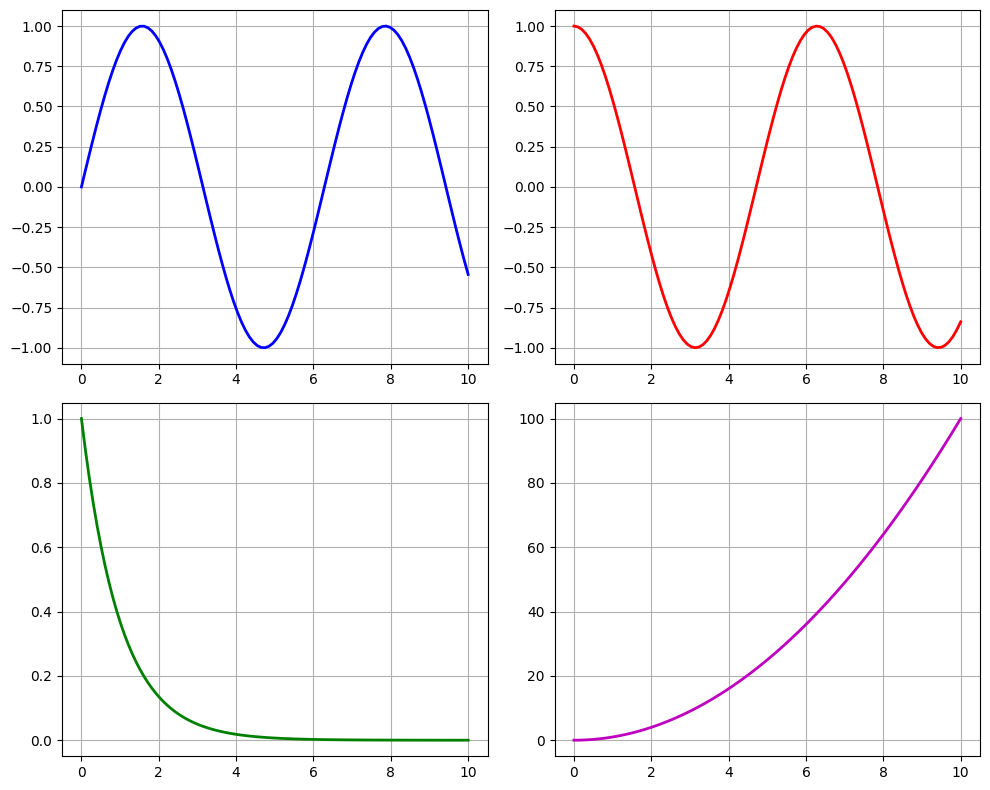

In [32]:
x = np.linspace(0, 10, 100)

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0, 0].plot(x, np.sin(x), 'b-', linewidth=2)
axes[0, 0].grid(True)

axes[0, 1].plot(x, np.cos(x), 'r-', linewidth=2)
axes[0, 1].grid(True)

axes[1, 0].plot(x, np.exp(-x), 'g-', linewidth=2)
axes[1, 0].grid(True)

axes[1, 1].plot(x, x**2, 'm-', linewidth=2)
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

Matplotlib 2

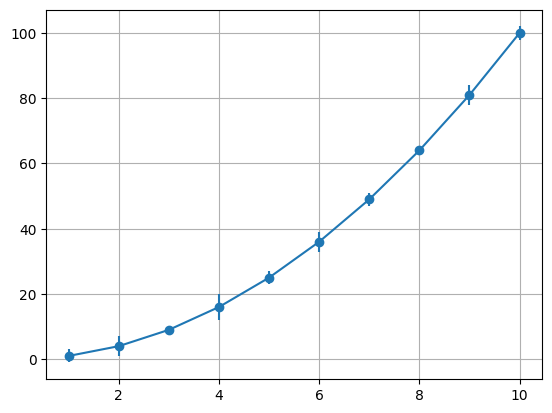

In [33]:
x = np.arange(1, 11)
y = x ** 2
errors = np.array([2, 3, 1, 4, 2, 3, 2, 1, 3, 2])

plt.errorbar(x, y, yerr=errors, fmt='o-')
plt.grid(True)
plt.show()



Matplotlib 3

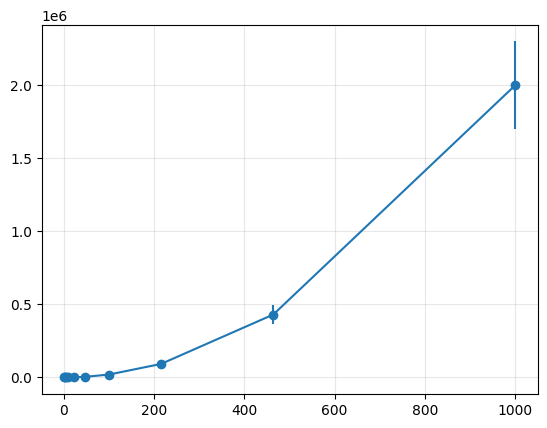

In [34]:
x = np.logspace(0, 3, 10)
y = 2 * x ** 2
errors = y * 0.15

plt.errorbar(x, y, yerr=errors, fmt='o-')

plt.grid(True, which='both', alpha=0.3)
plt.show()

### Погрешности

Погрешности 1

$ay^{3}+d=0$

$\Delta ay^{3}+3ay^{2}\Delta y+\Delta d=0\implies$

$\Delta y=\left( -\frac{y}{3a} \right)\cdot \Delta a+\left( - \frac{1}{3ay^{2}} \right)\cdot \Delta d=$

$[a=1,d=8,y=-2]$

$=\left( \frac{2}{3} \right)\cdot 10^{-3}-\left( \frac{1}{12} \right) \cdot 10^{-3}=\frac{7}{12}\cdot 10^{-3}\approx 0.00058$

Погрешности 2

In [35]:
import sympy

In [36]:
from sympy import init_printing, symbols, Function

x, h = symbols("x h")
u = Function("u")

def t(k):
    return u(x+k).series(h, x0=0, n=6)
exp = (t(-2*h)-8*t(-h)+8*t(h)-t(2*h))/(12*h)
exp

(12*h*Subs(Derivative(u(_xi_1), _xi_1), _xi_1, x) - 2*h**5*Subs(Derivative(u(_xi_1), (_xi_1, 5)), _xi_1, x)/5 + O(h**6))/(12*h)

$\implies \varepsilon _{method}=|u'(x)-\frac{u(x-2h)-8u(x-h)+8u(x+h)-u(x+2h)}{12h}|=$

$=\frac{1}{30} h^{4} \cdot |u^{(5)}(\xi)|\leq  \frac{M_{5}h^{4}}{30}$

$\varepsilon_{rounding}(\frac{u(x-2h)-8u(x-h)+8u(x+h)-u(x+2h)}{12h})=$

$=\frac{h(\Delta u+8\Delta u+8\Delta u+\Delta u)-\Delta h(\dots)}{12h^{2}}\approx \frac{3}{2}\cdot \frac{\Delta u}{h}$

$\varepsilon=\varepsilon _{method}+\varepsilon _{rounding}\implies$

$\varepsilon'=0=\frac{4M_{5}h^{3}}{30}-\frac{3\Delta u}{h^{2}}\implies$

$h_{opt} = \sqrt[5]{ \frac{45}{2} \frac{\Delta u}{M_{5}} }$

И порядок аппроксимации 4

### Погрешность определения корня уравнения

$x^{2}-2x+0,999993751=0$

In [37]:
from sympy import Symbol

x = Symbol('x')

print([0.0001/(2*(1-(sympy.solve(x**2 - 2*x+0.999993751, x)[i]))) for i in [0,1]]) # финальное выражение

[0.0200016001920258, -0.0200016001920258]


$x^{2}-2x+a=0\implies$

$2x\Delta x - 2\Delta x+ \Delta a=0,$

$[x_{1,2}^{*} = 0.9975002.., 1.002499..]$

$\Delta x \approx \frac{\Delta x}{x} = \frac{\Delta a}{(2-2x)}=0.02$

### Рост погрешности в последовательности

$5x_{n+1}-x_{n}=4 \implies x_{n} = x_{n}^{\text{общее}}+x_{n}^{\text{частное}}$

$5x_{n+1}=x_{n}\implies x_{n+1}=\frac{1}{5} x_{n}\implies x_{n}^{\text{общее}}=\frac{x_{0}}{5^{n}}$

$x_{n}^{\text{частное}}=1\implies x_{n} = \frac{x_{0}}{5^{n}}+1$

$\frac{\Delta x_{n}}{x_{n}}  =\frac{\left( \frac{\Delta x_{0}}{5^{n}} \right)}{\frac{x_{0}}{5^{n}}+1}=$

$=\frac{10^{-6}\cdot x_{0}}{x_{0}+5^{n}}=\frac{10^{-6}}{1+\frac{5^{n}}{x_{0}}}$

Значит, если $x_0$ это минус какая-то степень 5, то погрешность будет расти при приближении к этой точке и в ней будет бесконечна